Imports

In [695]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

### Original CMU dataset

In [696]:
df_cmu = pd.read_table('cmu_dataset/movie.metadata.tsv', names=['Wikipedia_ID', 'Freebase_ID', 'Name', 'Release_Date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])
df_cmu.head()


,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


Defining pre-processing functions 

In [697]:
def remove_id(s):
    res = ast.literal_eval(s)
    val = list(res.values())[:]
    return str(val)

def remove_language(s, pattern=' language'):
    s = ast.literal_eval(s)
    lang_clean=[]
    for lang in s:
        lang = lang.lower()
        lang_clean.append(str(lang).replace(pattern, ''))
    return str(lang_clean)

def remove_special_character(s):
    s = ast.literal_eval(s)
    tup_s = str(tuple(s))
    s = re.sub("[()']", '', tup_s)
    s = s.rstrip(',')
    s = s.lower()
    return str(s)

Cleaning the dataset

In [698]:
df_copy = df_cmu.copy(deep=True)
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_id(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_language(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_special_character(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_id(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_special_character(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_id(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_special_character(x))

Our dataset now

In [699]:
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,german,germany,drama


In [700]:
df_copy = df_copy.drop('Wikipedia_ID', axis=1)
df_copy = df_copy.drop('Runtime', axis=1)
#df_copy = df_copy.drop('Genres', axis=1)
df_copy.head()

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,Genres
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,english,united states of america,"mystery, biographical film, drama, crime drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,norwegian,norway,"crime fiction, drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,german,germany,drama


In [701]:
print(len(df_copy))

81741


In [702]:
df_copy.to_csv('../../data/cmu_cleaned.csv', index=False)

### Loading Tropes

In [703]:
import pandas as pd
import json

# Load the data into a DataFrame
df_tropes = pd.read_csv('cmu_dataset/tvtropes.clusters.txt', sep='\t', names=['category', 'details'])

# Convert the JSON strings in the 'details' column to dictionaries
df_tropes['details'] = df_tropes['details'].apply(json.loads)

# Use json_normalize to expand the JSON fields
details_df = pd.json_normalize(df_tropes['details'])

# Concatenate the 'category' column with the expanded JSON DataFrame
final_df_tropes = pd.concat([df_tropes[['category']], details_df], axis=1)

final_df_tropes = final_df_tropes.drop(columns=['char', 'id', 'actor'])
final_df_tropes = final_df_tropes[['movie', 'category']]
final_df_tropes = final_df_tropes.rename(columns={'movie':'Name', 'category':'Tropes'})
final_df_tropes.head()

,Name,Tropes
0,Flubber,absent_minded_professor
1,Richie Rich,absent_minded_professor
2,The Shadow,absent_minded_professor
3,Them!,absent_minded_professor
4,Stargate,absent_minded_professor


In [704]:
#final_df.Tropes.value_counts()
print(len(df_cmu))

81741


In [705]:
final_df_tropes['Name'] = final_df_tropes['Name'].str.lower()
final_df_tropes.head()

,Name,Tropes
0,flubber,absent_minded_professor
1,richie rich,absent_minded_professor
2,the shadow,absent_minded_professor
3,them!,absent_minded_professor
4,stargate,absent_minded_professor


### Adding Tropes to the cmu dataset

In [706]:
df_copy['Name'] = df_copy['Name'].str.lower()
tropes_merge = pd.merge(df_copy, final_df_tropes, how='outer', on=['Name'])
tropes_merge.shape
tropes_merge.sample(10)

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,Genres,Tropes
41844,/m/02vt1zl,mother's day,1980,NaN,english,united states of america,"thriller, horror, slasher",NaN
6373,/m/03qn18l,audience of one,2007-03-09,NaN,english,united states of america,"biography, film & television history, film, do...",NaN
66318,/m/05zlf_3,the invisible front,NaN,NaN,,germany,drama,NaN
16171,/m/09gn47r,dead man running,2009,980678.0,,united kingdom,"action/adventure, crime thriller, action, thri...",NaN
44311,/m/03h27jn,nine-tenths of the law,1918-05,NaN,"silent film, english",united states of america,"short film, silent film, drama, indie, black-a...",NaN
34525,/m/06_y9_p,la cigarra está que arde,1967,NaN,spanish,argentina,comedy film,NaN
16916,/m/06_ycsv,deshojando margaritas,1946,NaN,spanish,argentina,black-and-white,NaN
21633,/m/04vb8b,faust,1926-09-14,NaN,german,"weimar republic, germany","drama, horror, silent film, fantasy",NaN
5080,/m/0fr6g9,angel on my shoulder,1946,NaN,english,united states of america,"gangster film, religious film, fantasy, comedy...",NaN
25052,/m/076ygzt,good hair,2009-01-18,4028558.0,english,united states of america,"culture & society, comedy, documentary",NaN


In [707]:
df_copy.isna().sum()

Freebase_ID         0
Name                0
Release_Date     6902
Revenue         73340
Languages           0
Countries           0
Genres              0
dtype: int64

In [708]:
## tropes_merge
print(len(tropes_merge))
tropes_merge.isna().sum()

81914


Freebase_ID         0
Name                0
Release_Date     6910
Revenue         73394
Languages           0
Countries           0
Genres              0
Tropes          81218
dtype: int64

###  BoxOfficeMojo Dataset: 
BoxOfficeMojo dataset: https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_se_r_1  
The dataset is taken from the Github: https://github.com/ntdoris/movie-revenue-analysis/tree/main 


#### df_movie_budgets

In [709]:

df_movie_budgets = pd.read_csv('movie-revenue-analysis/zippedData/tn.movie_budgets.csv.gz')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [710]:
# Remove dollar signs and commas, and convert columns to numeric
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets = df_movie_budgets.rename(columns={'movie': 'Name', 'release_date': 'Release_Date'})
df_movie_budgets.drop(columns=['id'], inplace=True)

In [711]:
df_movie_budgets['Release_Date'] = pd.to_datetime(df_movie_budgets['Release_Date'])
df_movie_budgets['Release_Date'] = df_movie_budgets['Release_Date'].dt.year
df_movie_budgets

,Release_Date,Name,production_budget,domestic_gross,worldwide_gross
0,2009,Avatar,425000000,760507625,2776345279
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019,Dark Phoenix,350000000,42762350,149762350
3,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,2018,Red 11,7000,0,0
5778,1999,Following,6000,48482,240495
5779,2005,Return to the Land of Wonders,5000,1338,1338
5780,2015,A Plague So Pleasant,1400,0,0


In [712]:
# Replace 'domestic_gross' with NaN where it is NaN or equal to 0
df_movie_budgets.loc[df_movie_budgets['domestic_gross'].isna() | (df_movie_budgets['domestic_gross'] == 0), 'domestic_gross'] = np.nan

# Replace 'worldwide_gross' equals 'domestic_gross' (foreign_gross = 0)
df_movie_budgets.loc[df_movie_budgets['worldwide_gross'] == df_movie_budgets['domestic_gross'], 'worldwide_gross']= np.nan

df_movie_budgets['foreign_gross'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['domestic_gross']
df_movie_budgets.head()
print(f"Number of rows nans and zero domestic gross: {df_movie_budgets.isna().sum()}")

Number of rows nans and zero domestic gross: Release_Date            0
Name                    0
production_budget       0
domestic_gross        548
worldwide_gross      1252
foreign_gross        1800
dtype: int64


#### df_movie_gross

In [713]:
df_movie_gross = pd.read_csv('movie-revenue-analysis/zippedData//bom.movie_gross.csv.gz')
df_movie_gross = df_movie_gross.rename(columns={'title': 'Name', 'year': 'Release_Date'})
df_movie_gross.drop(columns = ['studio'], inplace=True)
df_movie_gross

,Name,domestic_gross,foreign_gross,Release_Date
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [714]:
# Replace 'domestic_gross' with NaN where it is NaN or equal to 0
df_movie_gross.loc[df_movie_gross['domestic_gross'].isna() | (df_movie_gross['domestic_gross'] == 0), 'domestic_gross'] = np.nan

# Replace ''foreign_gross' with NaN where it is NaN or equal to 0
df_movie_gross.loc[df_movie_gross['domestic_gross'].isna() | df_movie_gross['foreign_gross'] == df_movie_gross['domestic_gross'], 'worldwide_gross']= np.nan

In [715]:
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')
df_movie_gross['worldwide_gross'] = df_movie_gross['domestic_gross'] + df_movie_gross['foreign_gross']
print(f"Number of rows : {df_movie_gross.shape[0]}")
print(f"Number of rows with NaN: {df_movie_gross.isna().sum()}")
df_movie_gross.head()

Number of rows : 3387
Number of rows with NaN: Name                  0
domestic_gross       28
foreign_gross      1355
Release_Date          0
worldwide_gross    1383
dtype: int64


,Name,domestic_gross,foreign_gross,Release_Date,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08


#### Combined df_movie_gross, df_movie_budget

In [716]:
df_movie_gross['Name'] = df_movie_gross['Name'].str.strip().str.lower()
df_movie_budgets['Name'] = df_movie_budgets['Name'].str.strip().str.lower()

df_movie_gross['Name_Release_Date'] = df_movie_gross['Name'] + '_' + df_movie_gross['Release_Date'].astype(str)
df_movie_budgets['Name_Release_Date'] = df_movie_budgets['Name'] + '_' + df_movie_budgets['Release_Date'].astype(str)

# missing  movies
missing_movies = df_movie_gross[~df_movie_gross['Name_Release_Date'].isin(df_movie_budgets['Name_Release_Date'])]
missing_movies = missing_movies[['Name', 'Release_Date', 'domestic_gross', 'foreign_gross', 'worldwide_gross']]
df_movie_budgets.drop(columns=['Name_Release_Date'], inplace=True)
df_movie_combined = pd.concat([df_movie_budgets, missing_movies], ignore_index=True)
df_movie_combined['languages'] = np.nan
df_movie_combined

,Release_Date,Name,production_budget,domestic_gross,worldwide_gross,foreign_gross,languages
0,2009,avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,NaN
1,2011,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,NaN
2,2019,dark phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,NaN
3,2015,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,NaN
4,2017,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,NaN
...,...,...,...,...,...,...,...
7909,2018,the quake,NaN,6200.0,NaN,NaN,NaN
7910,2018,edward ii (2018 re-release),NaN,4800.0,NaN,NaN,NaN
7911,2018,el pacto,NaN,2500.0,NaN,NaN,NaN
7912,2018,the swan,NaN,2400.0,NaN,NaN,NaN


In [717]:
print(df_movie_combined.isna().sum())
df_movie_combined

Release_Date            0
Name                    0
production_budget    2132
domestic_gross        574
worldwide_gross      2473
foreign_gross        2995
languages            7914
dtype: int64


,Release_Date,Name,production_budget,domestic_gross,worldwide_gross,foreign_gross,languages
0,2009,avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,NaN
1,2011,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,NaN
2,2019,dark phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,NaN
3,2015,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,NaN
4,2017,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,NaN
...,...,...,...,...,...,...,...
7909,2018,the quake,NaN,6200.0,NaN,NaN,NaN
7910,2018,edward ii (2018 re-release),NaN,4800.0,NaN,NaN,NaN
7911,2018,el pacto,NaN,2500.0,NaN,NaN,NaN
7912,2018,the swan,NaN,2400.0,NaN,NaN,NaN


In [718]:
df_box_office_mojo = df_movie_combined.copy(deep=True)
df_box_office_mojo.to_csv('../../data/box_office_mojo.csv', index=False)

#### loading df_box_office_mojo and merging with megadataset

In [719]:
df_box_office_mojo.isna().sum()

Release_Date            0
Name                    0
production_budget    2132
domestic_gross        574
worldwide_gross      2473
foreign_gross        2995
languages            7914
dtype: int64

In [720]:

df_box_office_mojo = pd.read_csv('../../data/box_office_mojo.csv')
df_box_office_mojo 

df_box_office_mojo.rename(columns={'Release_Date': 'Year', 'production_budget': 'Budget'}, inplace=True)
df_box_office_mojo

,Year,Name,Budget,domestic_gross,worldwide_gross,foreign_gross,languages
0,2009,avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,NaN
1,2011,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,NaN
2,2019,dark phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,NaN
3,2015,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,NaN
4,2017,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,NaN
...,...,...,...,...,...,...,...
7909,2018,the quake,NaN,6200.0,NaN,NaN,NaN
7910,2018,edward ii (2018 re-release),NaN,4800.0,NaN,NaN,NaN
7911,2018,el pacto,NaN,2500.0,NaN,NaN,NaN
7912,2018,the swan,NaN,2400.0,NaN,NaN,NaN


In [721]:
# Group by 'Name' and aggregate with first, which picks the first non-NaN value, 
df_box_office_mojo = df_box_office_mojo.groupby('Name', as_index=False).agg(
    {
        'Year': 'first',  
        'Budget': 'first',  
        'domestic_gross': 'first',  
        'foreign_gross': 'first',  
        'worldwide_gross': 'first'  
    }
)
df_box_office_mojo


,Name,Year,Budget,domestic_gross,foreign_gross,worldwide_gross
0,#horror,2015,1500000.0,NaN,NaN,0.000000e+00
1,'71,2015,NaN,1300000.0,355000.0,1.655000e+06
2,(500) days of summer,2009,7500000.0,32425665.0,2013395.0,3.443906e+07
3,"1,000 times good night",2014,NaN,53900.0,NaN,NaN
4,10 cloverfield lane,2016,5000000.0,72082999.0,36203423.0,1.082864e+08
...,...,...,...,...,...,...
7801,zootopia,2016,150000000.0,341268248.0,678161368.0,1.019430e+09
7802,zulu,2013,16000000.0,NaN,NaN,1.844228e+06
7803,zwartboek,2007,22000000.0,4398532.0,22839822.0,2.723835e+07
7804,ã l\'intã©rieur,2008,3000000.0,NaN,NaN,8.959320e+05


In [722]:
tropes_merge.rename(columns = {'Release_Date':'Year'}, inplace=True)

In [723]:
df_megaset= pd.DataFrame

In [724]:
df_megaset = pd.merge(
    tropes_merge,
    df_box_office_mojo,
    on='Name',
    how='outer',
    suffixes=('_cmu', '_movies')
)

In [725]:
df_megaset.columns

Index(['Freebase_ID', 'Name', 'Year_cmu', 'Revenue', 'Languages', 'Countries',
       'Genres', 'Tropes', 'Year_movies', 'Budget', 'domestic_gross',
       'foreign_gross', 'worldwide_gross'],
      dtype='object')

In [726]:
tropes_merge.columns

Index(['Freebase_ID', 'Name', 'Year', 'Revenue', 'Languages', 'Countries',
       'Genres', 'Tropes'],
      dtype='object')

In [727]:
# # MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT

df_megaset = pd.merge(
    tropes_merge,
    df_box_office_mojo,
    on='Name',
    how='outer',
    suffixes=('_cmu', '_movies')
)

df_megaset['Year'] = df_megaset['Year_cmu'].combine_first(df_megaset['Year_movies'])
df_megaset = df_megaset.drop(columns = ['Year_cmu', 'Year_movies'])

df_megaset['worldwide_gross'] = df_megaset['foreign_gross'] + df_megaset['domestic_gross']

# Calculate foreign_percentage where worldwide_gross is not NaN; otherwise, set to NaN
df_megaset['foreign_percentage'] = np.where(
    df_megaset['worldwide_gross'].notna(), 
    df_megaset['foreign_gross'] / df_megaset['worldwide_gross'], 
    np.nan
)

# Calculate domestic_percentage where worldwide_gross is not NaN; otherwise, set to NaN
df_megaset['domestic_percentage'] = np.where(
    df_megaset['worldwide_gross'].notna(), 
    df_megaset['domestic_gross'] / df_megaset['worldwide_gross'], 
    np.nan
)

df_megaset = df_megaset[['Name', 'Year' , 'Languages', 'Countries', 'Genres', 'Tropes', 'Budget', 'domestic_gross', 'domestic_percentage', 'foreign_gross', 'foreign_percentage', 'worldwide_gross']]

df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010-09,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#1 cheerleader camp,2010,,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#horror,2015.0,NaN,NaN,NaN,NaN,1500000.0,NaN,NaN,NaN,NaN,NaN
4,$,1971-12-17,english,united states of america,"crime fiction, heist, action/adventure, thrill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85116,…all the marbles,1981,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
85117,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85118,…men olsenbanden var ikke død,1984,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
85119,₤500 reward,1918,"silent film, english",,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [728]:
# Check for duplicates in the 'Name' column
df_duplicates_sorted = df_megaset[df_megaset.duplicated('Name', keep=False)].sort_values(by='Name')

# Display the rows with duplicates
df_duplicates_sorted


,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
105,100 days,2001-02-01,english,united kingdom,drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,100 days,1991,hindi,india,"horror, suspense, world cinema",NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,100% love,2011-04,telugu,,romantic comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,100% love,2012-01-20,bengali,india,"romance film, comedy film",NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,12,2003-06-27,english,united states of america,"comedy film, musical, indie",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
84849,zindagi,1964,hindi,india,"family film, drama, musical",NaN,NaN,NaN,NaN,NaN,NaN,NaN
84848,zindagi,1976,hindi,india,bollywood,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84850,zindagi,1940,hindi,india,"family film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
84879,zoetrope,1999,english,united states of america,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [729]:
df_megaset.isna().sum()

Name                       0
Year                    6732
Languages               3207
Countries               3207
Genres                  3207
Tropes                 84425
Budget                 77994
domestic_gross         76371
domestic_percentage    79135
foreign_gross          79109
foreign_percentage     79135
worldwide_gross        79135
dtype: int64

# Add Indian Movies Dataset

https://www.kaggle.com/datasets/hammadjavaid/highest-grossing-indian-movies-2023?resource=download
Highest grossing Indian movies from 2000-2023

In [730]:
df_indian = pd.read_csv('Indian_dataset/Highest grossing Indian movies.csv')
df_indian.head()

,Film,Year,Director,Studio(s),Budget (est.),World wide gross (INR),World wide gross (USD),Gross in India (INR crore),Primary Language
0,Dangal,2016,Nitesh Tiwari,Aamir Khan Productions\nUTV Motion Pictures\nW...,₹70 crore,"₹2,024 crore",317.00,538.03,Hindi
1,Baahubali 2: The Conclusion,2017,S. S. Rajamouli,Arka Media Works,₹250 crore,"₹1,810.60 crore",217.27,1416.9,Telugu\nTamil
2,RRR *,2022,S. S. Rajamouli,DVV Entertainments,₹550 crore,"₹1,316 crore",157.92,944,Telugu
3,K.G.F: Chapter 2,2022,Prashanth Neel,Hombale Films,₹100 crore,"₹1,225",147.00,"1,008",Kannada
4,Pathaan,2023,Siddharth Anand,Yash Raj Films,₹250 crore,"₹1,050.3 crore",130.00,654.28,Hindi


In [731]:
# drop useless columns, get rid of crore
df_indian.drop(columns = ['Director', 'Studio(s)', 'Budget (est.)', 'World wide gross (USD)'], inplace= True)
df_indian['World wide gross (INR)'] = pd.to_numeric(
    df_indian['World wide gross (INR)']
    .str.replace('[₹,]', '', regex=True)    # Remove ₹ and comma
    .str.replace(' crore', '', regex=True)   # Remove 'crore'
)
df_indian['Gross in India (INR crore)'] = pd.to_numeric(df_indian['Gross in India (INR crore)'].str.replace('[₹,]', '', regex=True))

df_indian = df_indian.rename(columns={
    'Film': 'Name', 
    'Gross in India (INR crore)': 'Gross in India (INR)',
    'Primary Language': 'Languages'})
df_indian['Name'] = df_indian['Name'].str.strip().str.lower()

df_indian['World wide gross (INR)'] = df_indian['World wide gross (INR)'] * 10000
df_indian['Gross in India (INR)'] = df_indian['Gross in India (INR)'] * 10000


In [732]:
# Manual replacements of NaN values

df_indian.loc[df_indian['Name'] == 'brahmāstra: part one – shiva', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'chennai express', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'World wide gross (INR)'] = 0#412619769
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'Gross in India (INR)'] = 0#312437220
df_indian.loc[df_indian['Name'] == 'hindi medium', 'World wide gross (INR)'] = 0#2896854886
df_indian.loc[df_indian['Name'] == 'hindi medium', 'Gross in India (INR)'] = 0#670540311

df_indian['Year'] = df_indian['Year'].replace(2911, 2011)

df_na = df_indian[df_indian.isna().any(axis=1)]
df_na

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN
...,...,...,...,...,...,...
100,race 2,2013,1733600.0,1395100.0,Hindi,NaN
101,bala,2019,1714900.0,1390600.0,Hindi,NaN
102,bhaag milkha bhaag,2013,1699600.0,1512900.0,Hindi,NaN
103,ek villain,2014,1696200.0,1466900.0,Hindi,NaN


In [733]:
# Add foreign and percentage columns

df_indian['Foreign Gross (INR)'] = df_indian['World wide gross (INR)'] - df_indian['Gross in India (INR)']
df_indian['foreign_percentage'] = df_indian['Foreign Gross (INR)']/df_indian['World wide gross (INR)']
df_indian['domestic_percentage'] = df_indian['Gross in India (INR)']/df_indian['World wide gross (INR)']

df_indian.head()

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language,Foreign Gross (INR),foreign_percentage,domestic_percentage
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN,14859700.0,0.734175,0.265825
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN,3937000.0,0.217442,0.782558
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN,3720000.0,0.282675,0.717325
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN,2170000.0,0.177143,0.822857
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN,3960200.0,0.377054,0.622946


In [734]:
# Convert to USD based on the conversion rate of that year
# Manually found from https://www.bookmyforex.com/blog/1-usd-inr-1947-till-now/

# Initialize the DataFrame with years from 2000 to 2023
years = list(range(2000, 2024))
conversion_rates = [None] * len(years)  # Placeholder for manual input

# Create the DataFrame
df_conversion_rates = pd.DataFrame({
    'convert_year': years,
    'Conversion Rate (INR to USD)': conversion_rates
})

# Define the list of conversion rates for each year
conversion_rates = [
    44.94, 47.19, 48.61, 46.58, 45.32,  # Rates for 2000-2004
    44.10, 45.31, 41.35, 43.51, 48.41,  # Rates for 2005-2009
    45.73, 46.67, 53.44, 56.57, 62.33,  # Rates for 2010-2014
    62.97, 66.46, 67.79, 70.09, 70.39,  # Rates for 2015-2019
    76.38, 74.57, 81.35, 81.94          # Rates for 2020-2023
]

# Assign the list of conversion rates to the DataFrame
df_conversion_rates['Conversion Rate (INR to USD)'] = conversion_rates

# Merge df_indian with df_conversion_rates on the 'Year' column
df_indian = pd.merge(
    df_indian, df_conversion_rates,
    left_on='Year', right_on='convert_year',
    how='left'
)

# Convert to USD by dividing INR by the conversion rate
df_indian['worldwide_gross'] = (df_indian['World wide gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['domestic_gross'] = (df_indian['Gross in India (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['foreign_gross'] = (df_indian['Foreign Gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)

df_indian = df_indian.drop(columns=['World wide gross (INR)', 'Gross in India (INR)', 'Foreign Gross (INR)', 'Conversion Rate (INR to USD)', 'convert_year'])

In [735]:
df_indian['Countries'] = 'india'
df_indian['Languages'] = df_indian['Languages'].str.replace('[\n$,]', ' ', regex=True).str.lower()
df_indian = df_indian[['Name', 'Year', 'Countries', 'Languages', 'domestic_gross', 'domestic_percentage', 
                       'foreign_gross', 'foreign_percentage', 'worldwide_gross']]

df_indian

,Name,Year,Countries,Languages,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,dangal,2016,india,hindi,80955,0.265825,223588,0.734175,304544
1,baahubali 2: the conclusion,2017,india,telugu tamil,209013,0.782558,58076,0.217442,267089
2,rrr *,2022,india,telugu,116041,0.717325,45728,0.282675,161770
3,k.g.f: chapter 2,2022,india,kannada,123909,0.822857,26674,0.177143,150583
4,pathaan,2023,india,hindi,79848,0.622946,48330,0.377054,128179
...,...,...,...,...,...,...,...,...,...
100,race 2,2013,india,hindi,24661,0.804742,5983,0.195258,30645
101,bala,2019,india,hindi,19755,0.810893,4607,0.189107,24362
102,bhaag milkha bhaag,2013,india,hindi,26743,0.890151,3300,0.109849,30044
103,ek villain,2014,india,hindi,23534,0.864815,3678,0.135185,27213


COMBINE INTO MEGASET

In [736]:
# # # MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT

# df_megaset = pd.merge(
#     df_megaset,
#     df_indian,
#     on='Name',
#     how='outer',
#     suffixes=('_M', '_indian')
# )

# df_megaset['Year'] = df_megaset['Year_M'].combine_first(df_megaset['Year_indian'])
# df_megaset['worldwide_gross'] = df_megaset[['worldwide_gross_M', 'worldwide_gross_indian']].max(axis=1)
# df_megaset = df_megaset.drop(columns = ['Year_M', 'Year_indian', 'worldwide_gross_M', 'worldwide_gross_indian'])

# df_megaset

Preliminary Analysis On India only

In [737]:
year_min = df_indian['Year'].min()
year_max = df_indian['Year'].max()
print(f"Year range: {year_min} - {year_max}")

# Count the number of movies per year
movies_per_year = df_indian.groupby('Year').size()

# Display the result
print(movies_per_year)

Year range: 2008 - 2023
Year
2008     1
2009     1
2010     3
2011     5
2012     8
2013     7
2014     9
2015     5
2016     8
2017    12
2018    14
2019    16
2020     1
2021     3
2022     6
2023     6
dtype: int64


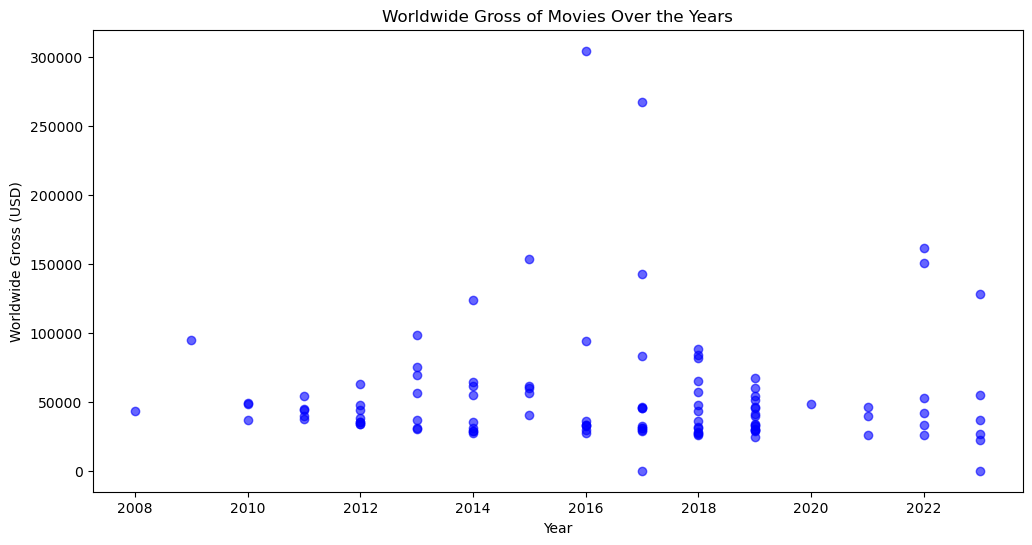

In [738]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_indian['Year'], df_indian['worldwide_gross'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of Movies Over the Years')

# Show the plot
plt.show()


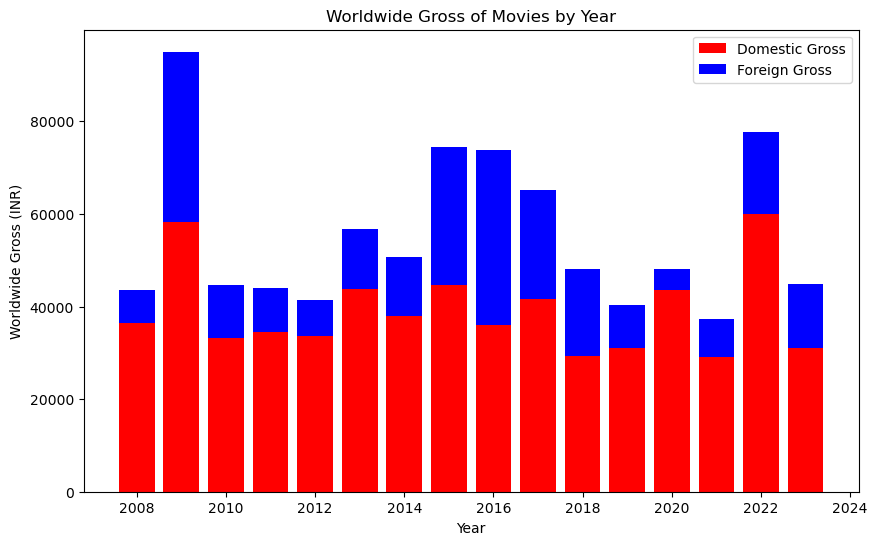

In [739]:
# First, group the data by 'Year' and calculate the sum for each year
yearly_data = df_indian.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (INR)')
plt.title('Worldwide Gross of Movies by Year')
plt.legend()

# Display the plot
plt.show()


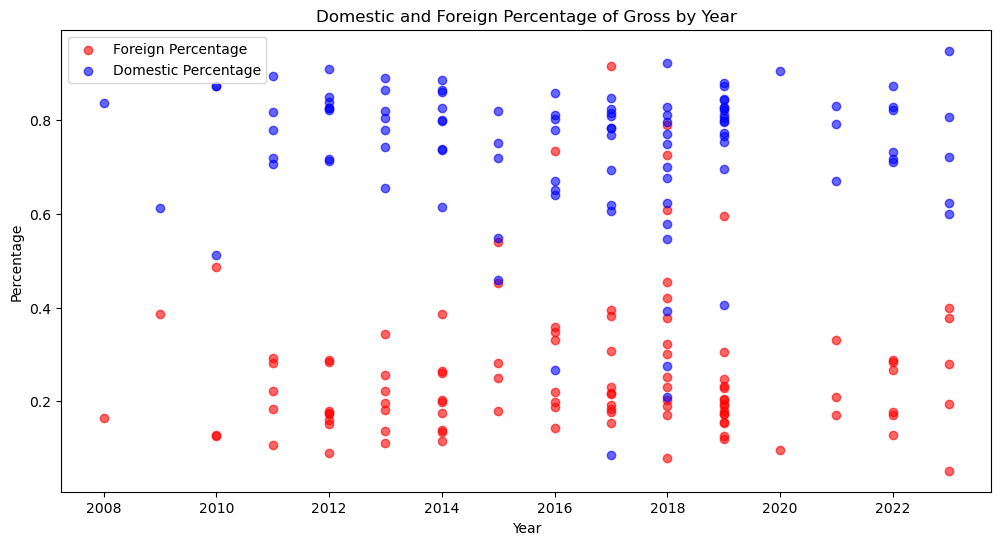

In [740]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot foreign_percentage in red
plt.scatter(df_indian['Year'], df_indian['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

# Plot domestic_percentage in blue
plt.scatter(df_indian['Year'], df_indian['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

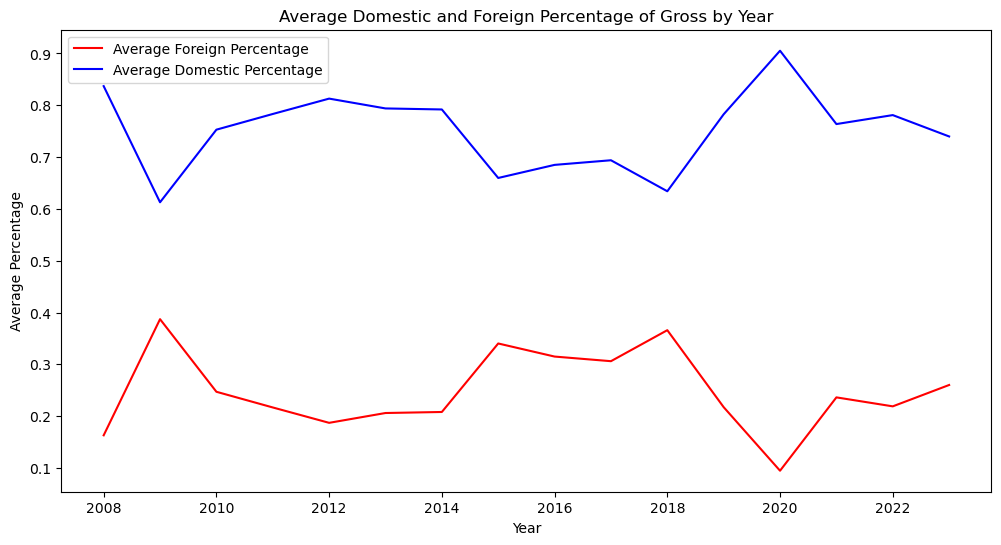

In [741]:
# Calculate the average foreign and domestic percentages for each year
average_percentages = df_indian.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot foreign_percentage as a red line
plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

# Plot domestic_percentage as a blue line
plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()


In [742]:
df_indian.to_csv('../../data/indian_movies.csv', index=False)



In [743]:
df_indian.isna().sum()

Name                   0
Year                   0
Countries              0
Languages              2
domestic_gross         0
domestic_percentage    2
foreign_gross          0
foreign_percentage     2
worldwide_gross        0
dtype: int64

In [744]:
df_megaset.isna().sum()

Name                       0
Year                    6732
Languages               3207
Countries               3207
Genres                  3207
Tropes                 84425
Budget                 77994
domestic_gross         76371
domestic_percentage    79135
foreign_gross          79109
foreign_percentage     79135
worldwide_gross        79135
dtype: int64

### Ameer's preprocessing: Movies Box Office Collection Data 2000-2024

In [745]:
path ='C:/Users/ameer/OneDrive/Desktop/alysuii/Project github/ada-2024-project-thelordsofdata/src/data/'

In [746]:
# List files in the directory to confirm the filename
print(os.listdir(path))

['box_office_mojo.ipynb', 'cmu_dataset', 'Indian_dataset', 'initial_analysis.ipynb', 'movie-revenue-analysis', 'Movies Box Office Collection Data 2000-2024', 'preprocessing.ipynb']


In [747]:
# Load the datasets
df1 = pd.read_csv(os.path.join(path, 'Movies Box Office Collection Data 2000-2024/2000-2009 Movies Box Ofice Collection.csv'))
df2 = pd.read_csv(os.path.join(path, 'Movies Box Office Collection Data 2000-2024/2010-2024 Movies Box Ofice Collection.csv'))
df3 = pd.read_csv(os.path.join(path, 'Movies Box Office Collection Data 2000-2024/2024 Movies Box Ofice Collection.csv'))

# Concatenate the datasets
df_collection_box_office = pd.concat([df1, df2, df3], ignore_index=True)
print(df_collection_box_office)


      Unnamed: 0                            Release Group     Worldwide  \
0            0.0                   Mission: Impossible II  54,63,88,108   
1            1.0                                Gladiator  46,05,83,960   
2            2.0                                Cast Away  42,96,32,142   
3            3.0                          What Women Want  37,41,11,707   
4            4.0                                 Dinosaur  34,98,22,765   
...          ...                                      ...           ...   
4995       195.0                    Buzz House: The Movie     29,10,112   
4996       196.0                                    We 12     28,64,154   
4997       197.0  Me Contro Te - Il film: Operazione Spie     27,98,501   
4998       198.0                           Menudas piezas     27,78,043   
4999       199.0                              Silent Love     27,39,320   

          Domestic Domestic_percent       Foreign Foreign_percent  year  Rank  
0     21,54,09,889 

### removing commas in worldwide, domestic and foreing coloumns as well as setting domestic 0 values to NAN, as well as their corresponding foreign_percent

In [748]:
# Remove commas and convert to numeric for the specified columns
for column in ['Worldwide', 'Domestic', 'Foreign']:
    df_collection_box_office[column] = df_collection_box_office[column].astype(str).str.replace(',', '').astype(float)

# Set Domestic zero values to NaN
df_collection_box_office['Domestic'] = df_collection_box_office['Domestic'].replace(0, np.nan)

# Set corresponding Domestic_percent to NaN if Domestic is NaN
df_collection_box_office['Domestic_percent'] = np.where(df_collection_box_office['Domestic'].isna(), np.nan, df_collection_box_office['Domestic_percent'])


# Set corresponding Foreign_percent to NaN if Domestic is NaN
df_collection_box_office['Foreign_percent'] = np.where(df_collection_box_office['Domestic'].isna(), np.nan, df_collection_box_office['Foreign_percent'])

df_collection_box_office

,Unnamed: 0,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Rank
0,0.0,Mission: Impossible II,546388108.0,215409889.0,39.40%,330978219.0,60.60%,2000,NaN
1,1.0,Gladiator,460583960.0,187705427.0,40.80%,272878533.0,59.20%,2000,NaN
2,2.0,Cast Away,429632142.0,233632142.0,54.40%,196000000.0,45.60%,2000,NaN
3,3.0,What Women Want,374111707.0,182811707.0,48.90%,191300000.0,51.10%,2000,NaN
4,4.0,Dinosaur,349822765.0,137748063.0,39.40%,212074702.0,60.60%,2000,NaN
...,...,...,...,...,...,...,...,...,...
4995,195.0,Buzz House: The Movie,2910112.0,NaN,NaN,2910112.0,NaN,2024,NaN
4996,196.0,We 12,2864154.0,NaN,NaN,2864154.0,NaN,2024,NaN
4997,197.0,Me Contro Te - Il film: Operazione Spie,2798501.0,NaN,NaN,2798501.0,NaN,2024,NaN
4998,198.0,Menudas piezas,2778043.0,NaN,NaN,2778043.0,NaN,2024,NaN


In [749]:
# Replace '<0.1' with '0.1' before removing '%' and converting to float
df_collection_box_office['Domestic_percent'] = df_collection_box_office['Domestic_percent'].str.replace('<0.1', '0.1').str.replace('%', '').astype(float)
df_collection_box_office['Foreign_percent'] = df_collection_box_office['Foreign_percent'].str.replace('<0.1', '0.1').str.replace('%', '').astype(float)


In [750]:
# Count rows that do not have NaN in the 'Domestic' column
non_nan_domestic_count = df_collection_box_office['Domestic'].notna().sum()

print("Number of rows without NaN in the 'Domestic' column:", non_nan_domestic_count)

Number of rows without NaN in the 'Domestic' column: 3789


In [751]:
### Putting the dataset up to standard for merging with our main dataset

In [752]:
# Dropping the first and last columns
df_collection_box_office = df_collection_box_office.drop(columns=['Unnamed: 0', 'Rank'])

# Converting all titles in the "Release Group" column to lowercase
df_collection_box_office['Release Group'] = df_collection_box_office['Release Group'].str.lower()

# Renaming the columns
df_collection_box_office = df_collection_box_office.rename(columns={'Release Group': 'Name', 
                        'Worldwide': 'worldwide_gross', 'Domestic': 'domestic_gross',
                        'Domestic_percent': 'domestic_percentage',  'Foreign': 'foreign_gross',
                        'Foreign_percent': 'foreign_percentage', 'year' : 'Year'})

# Reordering the coloumns
new_order = ['Name', 'Year', 'domestic_gross', 'domestic_percentage', 'foreign_gross', 'foreign_percentage', 'worldwide_gross']
df_collection_box_office = df_collection_box_office[new_order]

In [753]:
save_path = 'C:/Users/ameer/OneDrive/Desktop/alysuii/Project github/ada-2024-project-thelordsofdata/data/cleaned_Movies Box Office Collection Data 2000-2024.csv'
df_collection_box_office.to_csv(save_path, index=False)

Current Structure of the dataset:

In [754]:
df_collection_box_office.isna().sum()

Name                      0
Year                      0
domestic_gross         1211
domestic_percentage    1211
foreign_gross             0
foreign_percentage     1211
worldwide_gross           0
dtype: int64

In [694]:
df_megaset

,Name,Year_cmu,Languages,Countries,Genres,Tropes,Budget,domestic_gross_cmu,domestic_percentage_cmu,foreign_gross_cmu,foreign_percentage_cmu,worldwide_gross_cmu,Year_movies,domestic_gross_movies,domestic_percentage_movies,foreign_gross_movies,foreign_percentage_movies,worldwide_gross_movies
0,,1916,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010-09,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,NaN,NaN,49282156.0,NaN,49282156.0
3,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN,22263336.0,NaN,22263336.0
4,#1 cheerleader camp,2010,,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87068,…all the marbles,1981,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87069,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87070,…men olsenbanden var ikke død,1984,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87071,₤500 reward,1918,"silent film, english",,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert 'Year' to datetime and extract the year

print(df_megaset['Year'].dtype)
df_megaset['Year'] = pd.to_numeric(df_megaset['Year'], )

object


In [690]:
# # MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT

df_megaset = pd.merge(
    df_megaset,
    df_collection_box_office,
    on='Name',
    how='outer',
    suffixes=('_cmu', '_movies')
)

df_megaset['Year'] = np.maximum(df_megaset['Year_movies'], df_megaset['Year_cmu'])
df_megaset['domestic_gross'] = np.maximum(df_megaset['domestic_gross_cmu'], df_megaset['domestic_gross_movies'])
df_megaset['foreign_gross'] = np.maximum(df_megaset['foreign_gross_cmu'], df_megaset['foreign_gross_movies'])
df_megaset['worldwide_gross'] = df_megaset['foreign_gross'] + df_megaset['domestic_gross']

# Calculate foreign_percentage where worldwide_gross is not NaN; otherwise, set to NaN
df_megaset['foreign_percentage'] = np.where(
    df_megaset['worldwide_gross'].notna(), 
    df_megaset['foreign_gross'] / df_megaset['worldwide_gross'], 
    np.nan
)

# Calculate domestic_percentage where worldwide_gross is not NaN; otherwise, set to NaN
df_megaset['domestic_percentage'] = np.where(
    df_megaset['worldwide_gross'].notna(), 
    df_megaset['domestic_gross'] / df_megaset['worldwide_gross'], 
    np.nan
)

df_megaset.drop(columns=['Year_cmu','domestic_gross_cmu', 'domestic_percentage_cmu',
       'foreign_gross_cmu', 'foreign_percentage_cmu', 'worldwide_gross_cmu',
       'Year_movies', 'domestic_gross_movies', 'domestic_percentage_movies',
       'foreign_gross_movies', 'foreign_percentage_movies',
       'worldwide_gross_movies'], inplace=True)

df_megaset.columns

TypeError: '>=' not supported between instances of 'float' and 'str'

In [628]:
# reordering the columns: 
df_megaset = df_megaset[['Name', 'Year', 'Languages', 'Countries', 'Genres', 'Tropes', 'Budget',
       'domestic_gross', 'domestic_percentage', 'foreign_gross','foreign_percentage', 'worldwide_gross']]

In [629]:
df_megaset.isna().sum()

Name                       0
Year                    6732
Languages               3207
Countries               3207
Genres                  3207
Tropes                 84425
Budget                 77994
domestic_gross         76371
domestic_percentage    79135
foreign_gross          79109
foreign_percentage     79135
worldwide_gross        79135
dtype: int64

# PRE PROCESSING DONE, FINAL MEGASET SAVED

In [489]:
df_megaset.columns

Index(['Name', 'Year', 'Languages', 'Countries', 'Genres', 'Tropes', 'Budget',
       'domestic_gross', 'domestic_percentage', 'foreign_gross',
       'foreign_percentage', 'worldwide_gross'],
      dtype='object')

In [490]:
df_megaset['Year'] = pd.to_numeric(df_megaset['Year'], errors='coerce')
df_megaset.to_csv('../../data/megaset.csv', index=False)